In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [2]:
path_to_results = '/home/ng213/pazy_code/pazy-aepw3-results/02_Torsion/'

In [3]:
torsion_results = {}
torsion_results['sharpy_w_skin'] = {'file': path_to_results + '/torsion_SHARPy_w_skin.txt',
                                    'skin': True,
                                    'marker': 'o',
                                    'ms': 6,
                                   'label':'SHARPy'}
torsion_results['sharpy_wo_skin'] = {'file': path_to_results + '/torsion_SHARPy_wo_skin.txt',
                                     'skin': False,
                                     'marker': 'o',
                                     'ms': 6,
                                    'label': 'SHARPy'}
torsion_results['technion_mrm_w_skin'] = {'file': path_to_results + '/torsion_mrm_umbeam_w_skin.txt',
                                          'skin': True,
                                          'marker': '^',
                                          'ms': 6,
                                         'label': 'MRM'}
torsion_results['technion_mrm_wo_skin'] = {'file': path_to_results + '/torsion_mrm_umbeam_wo_skin.txt',
                                           'marker': '^',
                                           'ms': 6,
                                           'skin': False,
                                          'label': 'MRM'}
torsion_results['technion_experimental_w_skin'] = {'file': path_to_results + '/torsion_technion_experimental_w_skin.txt',
                                            'skin': True,
                                           'label': 'Technion Experimental',
                                           'marker': 'x',
                                            'ms': 6,
                                            'ls':'none'
                                           }
torsion_results['technion_experimental_wo_skin'] = {'file': path_to_results + '/torsion_technion_experimental_wo_skin.txt',
                                            'skin': False,
                                           'label': 'Technion Experimental',
                                           'marker': 'x',
                                            'ms': 6,
                                            'ls':'none'
                                           }
torsion_results['um_w_skin'] = {'file': path_to_results + '/torsion_UMNAST_w_skin.txt',
                                    'skin': True,
                                    'marker': 's',
                                    'ms': 6,
                                   'label':'UM/NAST',
                               'linestyle': {'markevery': 5}}
torsion_results['um_wo_skin'] = {'file': path_to_results + '/torsion_UMNAST_wo_skin.txt',
                                     'skin': False,
                                     'marker': 's',
                                     'ms': 6,
                                    'label': 'UM/NAST',
                                'linestyle': {'markevery': 5}}
torsion_results['nastran'] = {'file': path_to_results + '/torsion_UMNAST_parentFEM_wo_skin.txt',
                                     'skin': False,
                                     'marker': '+',
                                     'ms': 6,
                                    'label': 'Nastran FEM',
                             'ls':'none'}



In [4]:
for key, case in torsion_results.items():
    case['data'] = np.loadtxt(case['file'])

## Vertical Displacement

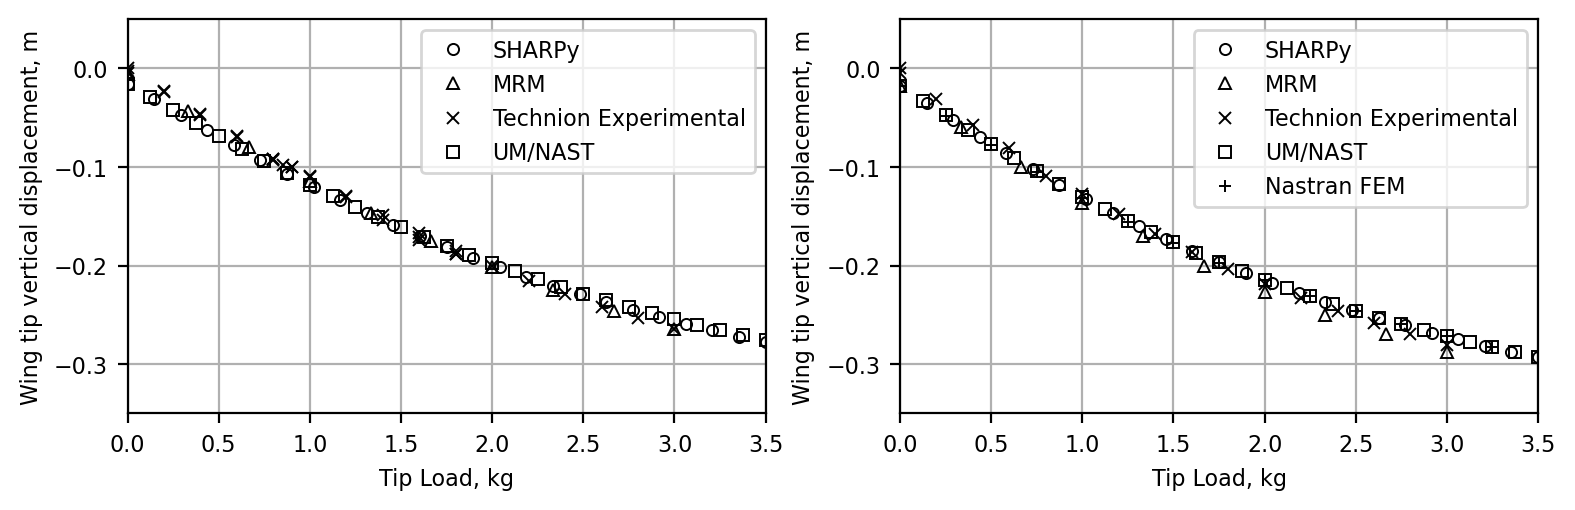

In [5]:
cm2in = 1/2.54
ar = 1.57
ar = 3
width_cm = 20

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(ncols=2, figsize=figsize)

for case in torsion_results.values():
    if case['skin']:
        a = ax[0]
    else:
        a = ax[1]    
    
    a.plot(case['data'][:, 0], case['data'][:, 1], label=case['label'], marker=case['marker'], ms=4, mfc='none', ls='none',
           lw=0.5, color='k', markeredgewidth=0.7,
           **case.get('linestyle', {}))

for a in ax:
    a.legend(fontsize=8)
    a.set_xlim(0, 3.5)
    a.set_ylim(-0.35, 0.05)
    a.set_xlabel('Tip Load, kg')
    a.set_ylabel('Wing tip vertical displacement, m')
    a.grid()
    for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
        item.set_fontsize(8)

plt.tight_layout()
plt.savefig('../figures/02a_Torsion_Displacement.pdf')

### Twist Angle

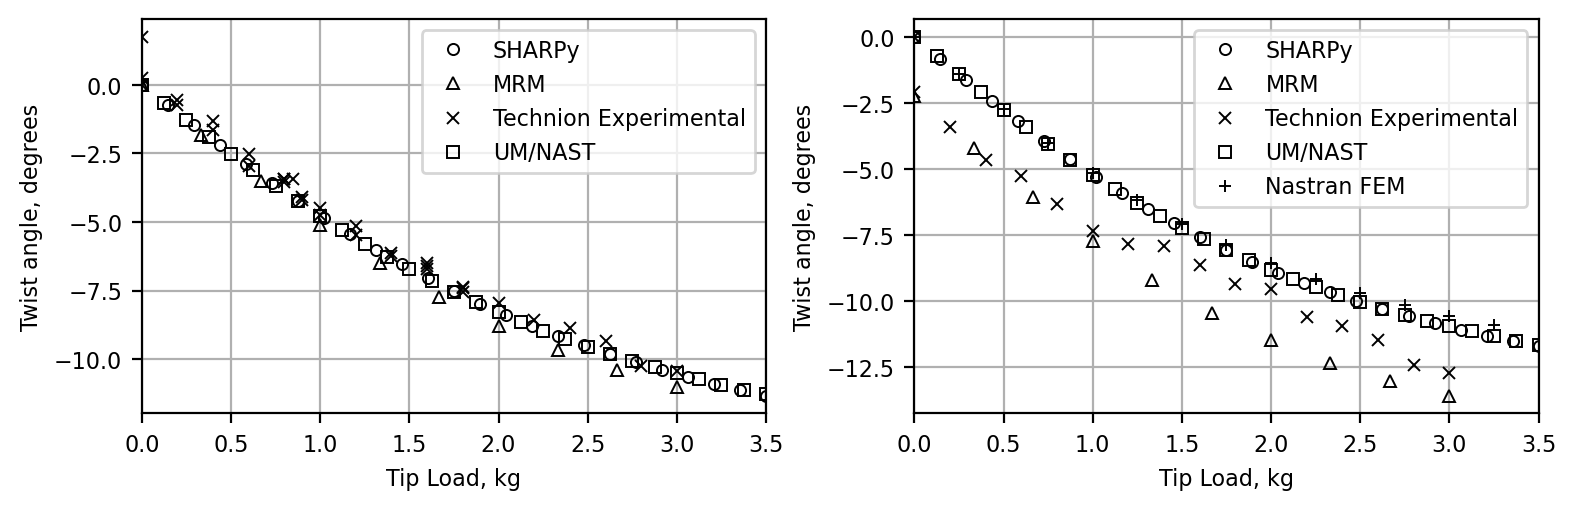

In [6]:
cm2in = 1/2.54
ar = 1.57
ar = 3
width_cm = 20

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(ncols=2, figsize=figsize)

for key, case in torsion_results.items():
    if case['skin']:
        a = ax[0]
    else:
        a = ax[1]    
    
    a.plot(case['data'][:, 0], case['data'][:, 2], label=case['label'], marker=case['marker'], ms=4, mfc='none', ls='none',
           lw=0.5, color='k', markeredgewidth=0.7,
           **case.get('linestyle', {}))

for a in ax:
    a.legend(fontsize=8)
    a.set_xlim(0, 3.5)
    a.set_xlabel('Tip Load, kg')
    a.set_ylabel('Twist angle, degrees')
    a.grid()
    for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
        item.set_fontsize(8)

plt.tight_layout()
plt.savefig('../figures/02a_Torsion_Angle.pdf')